# Estimation of parameters in radiactive decay model                                                                                                  

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import math


In [2]:
def model (A,lamda,t):

    if len(A) != len(lamda):
        print ("The length does not match")


    A, lamda = np.array(A).flatten(),np.array(lamda).flatten()
    return (np.sum(A*np.exp(-lamda*t)))
    

In [3]:
n = 256
A = [1.5,1.20,2,1.6,1.80]  #parameters A 
array_A = np.asarray(A)
lamda = [0.3,0.8,0.6,0.5,0.8]
array_lamda = np.asarray(lamda)
#print array_lamda[2]
sigma = 1
t_grid = np.linspace(0,10,n)
#print t_grid
array_t_grid = np.asarray(t_grid)
tru_y = [model(A,lamda,t) for t in t_grid]
noise = np.random.normal(size=(n))
data_y = tru_y + noise
array_data_y = np.asarray(data_y)
ti,yi = t_grid,data_y

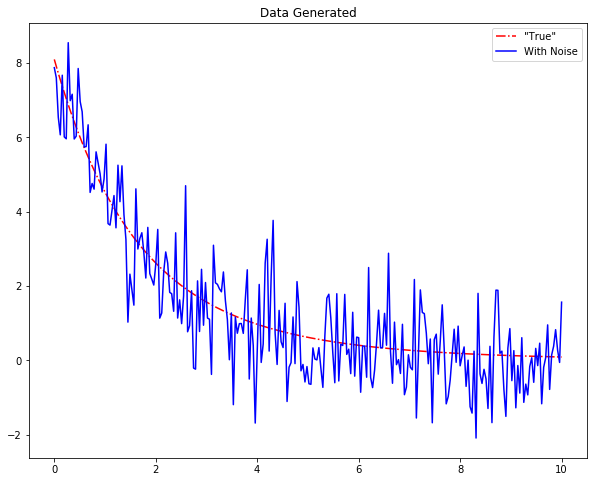

In [4]:
plt.figure(figsize = (10,8))
plt.plot(t_grid,tru_y,'r-.',label = '\"True\"')
plt.plot(t_grid,data_y,'b-',label = "With Noise")
plt.title("Data Generated")
plt.legend()
plt.show()
#print math.pi

In [142]:
# This function calculate the Log-likelyhood function
#The reason I make it "Log-likelyhood is because the likehood is small when we take the product of "small values" it is extremely small therefore 
# may result in inaccuracy caused by python system

def Cal_Log_Likelyhood(t_data,y_data,A_data,lamda_data,sigma):
    #print t_data;
    N = len(t_data)
    M = len(A_data)
    Constant = -0.5*N*math.log(2*math.pi*sigma**2)
    
    result = 0
    S1 = np.zeros(N)   
            
    for i in range(N):
        for j in range(M):
                S1[i] = S1[i]+A_data[j]*math.exp(-lamda_data[j]*t_data[i])-y_data[i]
                #print S1[i];
            
    

    for l in range(N):
        result = result + S1[l]**2
        #print result     
    
    final_result = -result*0.5/(sigma**2) + Constant
       
    return final_result




    

In [143]:
#This function do metropolas hesting with respect to the first lambda. In this case we use Gaussain with mean 0 as our proposal distribution.
#All the other lambdas are similar
def Metro_Hast_Lamda(t_data,y_data,A_data,lamda_data,sigma):
    #C = lamda_data[0]
    N = len(lamda_data)
    lamda_proposal = np.random.normal(0,1)
    if lamda_proposal < 0:
            lamda_proposal = -lamda_proposal;
    
    lamda_data_proposal = np.zeros(N) 
    lamda_data_proposal[0] = lamda_proposal
    for i in range(1,N):
        lamda_data_proposal[i] = lamda_data[i]
  
    
        
    
    #print lamda_data_proposal
    prior_current = st.multivariate_normal.logpdf(lamda_data[0],0,1)
    #prior_current
    prior_proposal = st.multivariate_normal.logpdf(lamda_proposal,0,1)
    #prior_proposal
    result = prior_proposal-prior_current+Cal_Log_Likelyhood(t_data,y_data,A_data,lamda_data_proposal,sigma)-Cal_Log_Likelyhood(t_data,y_data,A_data,lamda_data,sigma)
    
    p_accept = min(result,0)
    #print p_accept
    number = math.log(np.random.uniform(0,1))
    if number <  p_accept:
        lamda_data[0] = lamda_proposal
    if number < math.log(0.15):
        lamda_data[0] = lamda_proposal
    else:
        lamda_data[0] =lamda_data[0]
    #print lamda_data[0]
    return lamda_data[0]
    
    
    
    


In [144]:
#This function do metropolas hesting with respect to the first A. In this case we use Gaussain with mean 0 as our proposal distribution.
#All the other "A"s are similar

def Metro_Hast_A(t_data,y_data,A_data,lamda_data,sigma):
    #C = lamda_data[0]
    N = len(A_data)
    A_proposal = np.random.normal(0,1)
    if A_proposal < 0:
            A_proposal = -A_proposal;
    
    A_data_proposal = np.zeros(N) 
    A_data_proposal[0] = A_proposal
    for i in range(1,N):
        A_data_proposal[i] = A_data[i]
        #print lamda_data_proposal
    prior_current = st.multivariate_normal.logpdf(A_data[0],0,1)
    #prior_current
    prior_proposal = st.multivariate_normal.logpdf(A_proposal,0,1)
    #prior_proposal
    result = prior_proposal-prior_current+Cal_Log_Likelyhood(t_data,y_data,A_data_proposal,lamda_data,sigma)-Cal_Log_Likelyhood(t_data,y_data,A_data,lamda_data,sigma)
    
    p_accept = min(result,0)
    #print p_accept
    number = math.log(np.random.uniform(0,1))
    if number <  p_accept:
        A_data[0] = A_proposal
    if number < math.log(0.15):
        A_data[0] = A_proposal
    else:
        A_data[0] =A_data[0]
    #print lamda_data[0]
    return A_data[0]
  
    

0.305932456324
2.59280069753


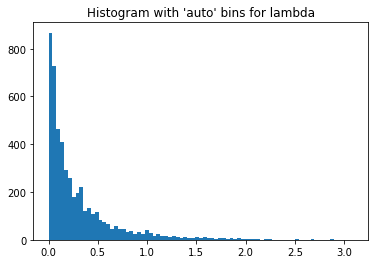

In [145]:
#This cell do metropolis hasting with respect to "the first lambda" for Num_run times and return the value each time after doing metropolis hasting 

L_array = []
lamda_proposal = [10.0,0.8,0.6,0.5,0.8]
p_lambda = np.asarray(lamda_proposal)
Num_run = 5000
i = 0
while (i < Num_run):
    a = Metro_Hast_Lamda(array_t_grid,data_y,array_A,array_lamda,sigma)
    L_array.append(a)
    array_lamda[0] = a
    #print array_lamda
    i =  i + 1
    
    #a = Metro_Hast(array_t_grid,data_y,array_A,array_lamda,sigma)
    #print a
    
LL_array = np.asarray(L_array)

Num_accept = len(set(LL_array)) - 1

#print Num_accept

print ("mean of lambda is %f" %np.mean(LL_array))

print a_array[Num_run-1]

#please note the first number printed is the mean of all the estimation
    
#The last number print is the last estimation. From the gragh we can see that the estimate of the lambda parameter 
# follows exponential distribution

plt.hist(LL_array, bins='auto')  # plt.hist passes it's arguments to np.histogram
plt.title("Histogram with 'auto' bins for lambda")
plt.show()

mean of A[1] is 1.537972
0.857316344582


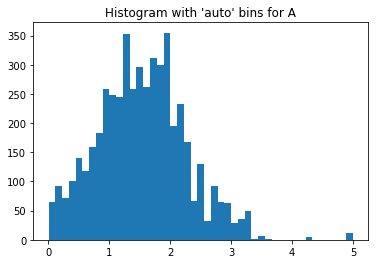

In [146]:
#This cell do metropolis hasting with respect to"the first" A for Num_run times 
proposal_A = [5.0,1.20,2,1.6,1.80]
p_A = np.asarray(proposal_A)
array = []
Num_run = 5000
i = 0
while (i < Num_run):
    a = Metro_Hast_A(array_t_grid,data_y,p_A,array_lamda,sigma)
    array.append(a)
    p_A[0] = a
    #print array_lamda
    i =  i + 1
    
    #a = Metro_Hast(array_t_grid,data_y,array_A,array_lamda,sigma)
    #print a
    
a_array = np.asarray(array)

Num_accept = len(set(a_array)) - 1

#print Num_accept

print ("mean of A[1] is %f" %np.mean(a_array))

print a_array[Num_run-1]

#please note the first number printed is the mean of all the estimation
#The last number print is the last estimation. From the gragh we can see that the estimate of the first_A parameter
# follows normal distribution


plt.hist(array, bins='auto')  # plt.hist passes it's arguments to np.histogram
plt.title("Histogram with 'auto' bins for A")
plt.show() 

5000


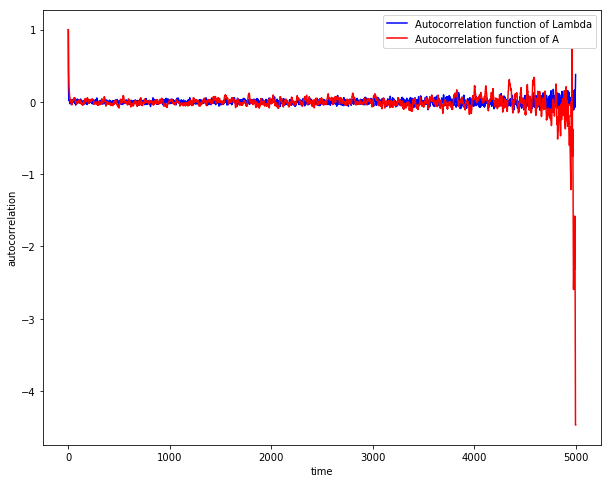

In [147]:
# This cell calculate the autocorrelation function and draw graph of it
def estimate_autocorrelation(x):
    n = len(x)
    variance = x.var()
    x = x - x.mean()
    r = np.correlate(x,x,mode = 'full')[-n:]
    result = r/(variance*(np.arange(n,0,-1)))
    return result


#t_grid = np.linspace(0,10,n)

#tru_y = [model(A,lamda,t) for t in t_grid]

true_y = np.asarray(tru_y)

Num_Monte_Carlo = 5000

time_array = np.arange(0,Num_Monte_Carlo)

#print time_array



#print true_y

#estimate_autocorrelation(true_y)

print len(LL_array)
plt.figure(figsize = (10,8))
plt.plot(time_array,estimate_autocorrelation(LL_array),'b-',label = "Autocorrelation function of Lambda" )
plt.plot(time_array,estimate_autocorrelation(a_array),'r-',label = "Autocorrelation function of A" )

#plt.plot(t_grid,estimate_autocorrelation(true_y))
plt.xlabel('time')
plt.ylabel('autocorrelation')
#plt.plot(t_grid,estimate_auto,'b-',label = "With Noise")
plt.legend()
plt.show()


    
    